# import models

In [62]:
import tensorflow as tf ### models
import numpy as np ### math computations
import matplotlib.pyplot as plt ### plotting bar chart
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from google.colab import drive

# Download the data set

In [63]:
dataset, dataset_info = tfds.load('malaria',
                                  with_info = True,
                                  as_supervised= True,
                                  shuffle_files= True,
                                  split=['train'])

In [64]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO* DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO* DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))
  return train_dataset, val_dataset, test_dataset

In [65]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [66]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

# Data vizualization

(-0.5, 114.5, 123.5, -0.5)

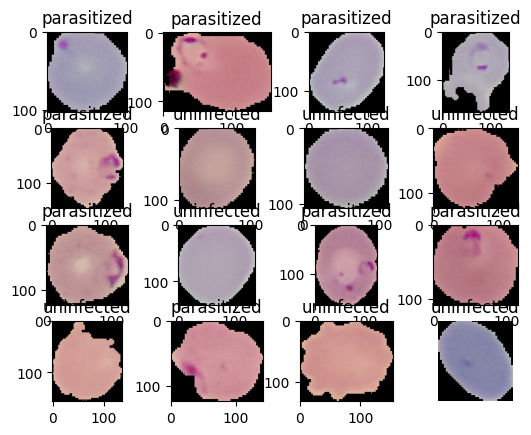

In [67]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
plt.axis('off')

In [68]:
dataset_info.features['label'].int2str(1)

'uninfected'

# Data Preprocessing:

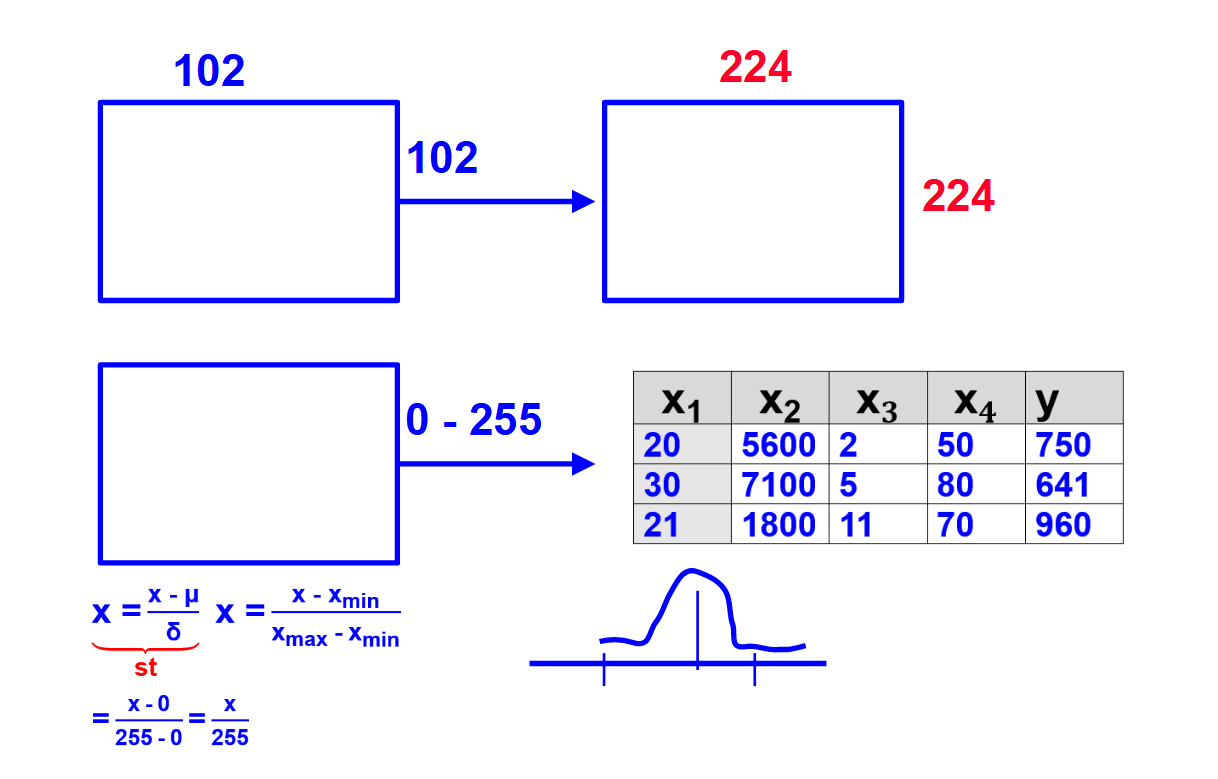



In [69]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [70]:
train_dataset =  train_dataset.map(resize_rescale)
val_dataset =  val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [71]:
for data in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(124, 115, 3), dtype=uint8) tf.Tensor(1, shape=(), dtype=int64)


In [72]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [73]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [74]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [75]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Model Creation

In [76]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters=6, kernel_size=6, strides=1, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides = 2),

    Conv2D(filters=16, kernel_size=3, strides=1, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides = 2),
    Flatten(),
    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid'),



])

lenet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 219, 219, 6)       654       
                                                                 
 batch_normalization_4 (Batc  (None, 219, 219, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 109, 109, 6)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 107, 107, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 107, 107, 16)     64        
 hNormalization)                                                 
                                                      

In [77]:
y_true = [0,1,0,0]
y_pred = [0.6, 0.51, 0.94, 1]
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9340706>

In [78]:
lenet_model.compile(optimizer = Adam(learning_rate=0.01),
                    loss = BinaryCrossentropy(),
                    metrics = 'accuracy')

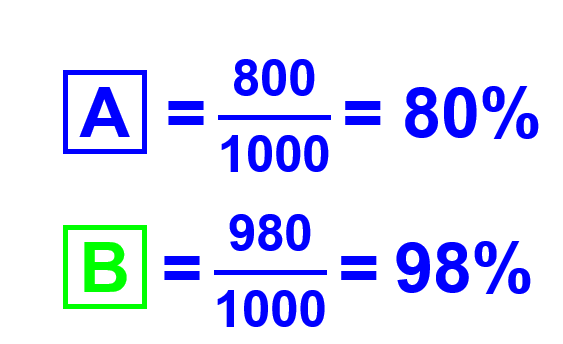

In [79]:
history = lenet_model.fit(train_dataset, validation_data=val_dataset, epochs = 20, verbose = 1)

Epoch 1/20
689/689 [==============================] - 56s 74ms/step - loss: 0.5170 - accuracy: 0.7412 - val_loss: 1.6917 - val_accuracy: 0.5230
Epoch 2/20
689/689 [==============================] - 53s 77ms/step - loss: 0.2428 - accuracy: 0.9157 - val_loss: 0.2084 - val_accuracy: 0.9347
Epoch 3/20
689/689 [==============================] - 53s 76ms/step - loss: 0.2020 - accuracy: 0.9316 - val_loss: 0.6136 - val_accuracy: 0.8425
Epoch 4/20
689/689 [==============================] - 56s 81ms/step - loss: 0.1968 - accuracy: 0.9334 - val_loss: 0.2216 - val_accuracy: 0.9296
Epoch 5/20
689/689 [==============================] - 52s 76ms/step - loss: 0.1901 - accuracy: 0.9354 - val_loss: 0.3439 - val_accuracy: 0.8417
Epoch 6/20
689/689 [==============================] - 61s 89ms/step - loss: 0.1847 - accuracy: 0.9377 - val_loss: 0.2917 - val_accuracy: 0.9034
Epoch 7/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1789 - accuracy: 0.9416 - val_loss: 0.2406 - val_accuracy:

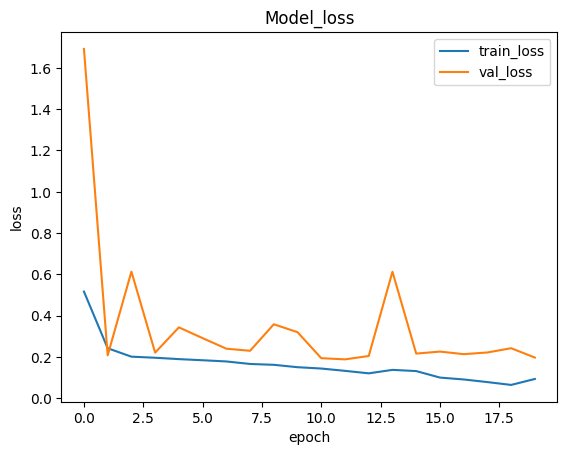

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

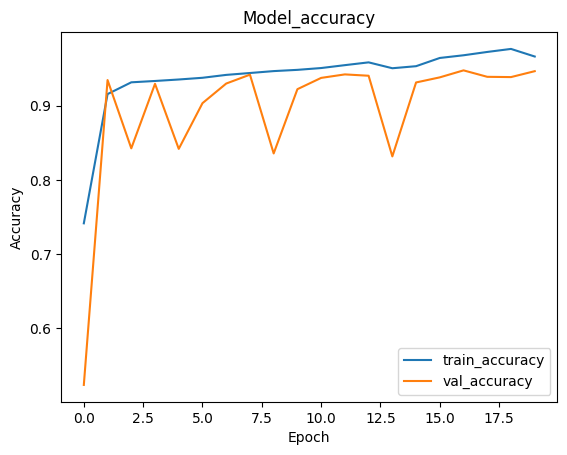

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# Model Evaluation and Testing

In [82]:
test_dataset = test_dataset.batch(1)

In [83]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

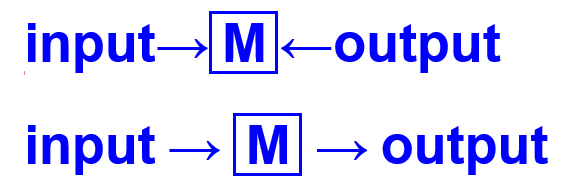

In [84]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 23s 4ms/step - loss: 0.2092 - accuracy: 0.9427


[0.20915743708610535, 0.9426913261413574]

In [85]:
paraside_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 13s 13s/step


'U'

In [86]:
def paraside_or_not(x):
  if(x < 0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 19ms/step


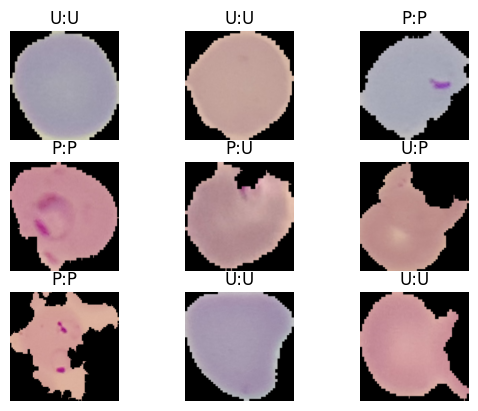

In [87]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(paraside_or_not(label.numpy()[0])) + ":" +str(paraside_or_not(lenet_model.predict(image)[0][0])))
  plt.axis('off')

# Loading and Saving

In [88]:
lenet_model.save("LenetSavedModel")

In [89]:
lenet_model = tf.keras.models.load_model('LenetSavedModel')
lenet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 219, 219, 6)       654       
                                                                 
 batch_normalization_4 (Batc  (None, 219, 219, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 109, 109, 6)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 107, 107, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 107, 107, 16)     64        
 hNormalization)                                                 
                                                      

In [90]:
lenet_model.save("lenet.hdf5")

In [91]:
lenet_model.save_weights("weights/lenet_weights")

# Google Drive

In [92]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
